In [44]:
#Analysis
#The urban market segment has over 60% of total fares, almost 70% of total rides, and has over 75% of total Pyber Drivers.  Therefore, it is the largest
#market segment for our company across the board.  Please refer to the three pie charts for visualization of this.

#The suburban city of Port James had the greatest number of total rides (64) and hit right around the average fare amount ($31) for the suburban fares. Please refer to 
#"Pyber Ride Sharing Data (2016)" for visualization of this.

#If we average together the average fares by city then we see that urban has the lowest average fare ($24.60), suburban has the middle amount ($31) and rural has the highest 
#average fare amount ($34.20).  Within the rural category are the two cities with the highest average fare: Manuelchester ($49.60) and Matthewside ($43.50). PLease refer to the "Pyber Ride Sharing Data (2016) chart for a visualization of this breakdown.

# Get Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
#Read in the CSV to Dataframes
citydata_pd = pd.read_csv("city_data.csv")
ridedata_pd = pd.read_csv("ride_data.csv")

In [46]:
# Merge the two dataframes
merge_table = pd.merge(citydata_pd, ridedata_pd, on="city")
merge_table = merge_table[["city", "date", "fare", "ride_id", "driver_count", "type"]]

In [47]:
#Calculate Total Drivers
tot_drivers = citydata_pd.groupby("city")["driver_count"].sum()

In [48]:
#Formatting for Plot
pd.options.display.float_format = '{:.1f}'.format
plt.figure(figsize=(7,5))

In [49]:
urban = merge_table[(merge_table["type"]== "Urban")]
suburban = merge_table[(merge_table["type"]== "Suburban")]
rural = merge_table[(merge_table["type"]== "Rural")]

In [50]:
#Calculate Average Fare group by City
avg_urban = urban.groupby(["city"]).mean()["fare"].round(1)
avg_suburban = suburban.groupby(["city"]).mean()["fare"].round(1)
avg_rural = rural.groupby(["city"]).mean()["fare"].round(1)

In [51]:
totrideurban = urban.groupby(["city"]).count()["ride_id"]
totridesub = suburban.groupby(["city"]).count()["ride_id"]
totriderural = rural.groupby(["city"]).count()["ride_id"]


In [52]:
# Create a Scatter Plot for the Three City Types
fig = plt.figure(1)
ax = fig.add_subplot(111, facecolor='lavender')
# The size of each point on our plot is determined by their x value
urban_scat = plt.scatter(totrideurban, avg_urban, marker="o", facecolors="coral", edgecolors="black", alpha=0.8,
            s=totrideurban*7)
suburban_scat = plt.scatter(totridesub, avg_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=totridesub*7)
rural_scat = plt.scatter(totriderural, avg_rural, marker="o", facecolors="gold", edgecolors="black",
            s=totriderural*7)
#total_scat = plt.scatter([totrideurban,totridesub,totriderural],[avg_urban,avg_suburban,avg_rural],marker='o',facecolors=['coral','lightskyblue','gold'],edgecolors='black',alpha=0.8,s=[])

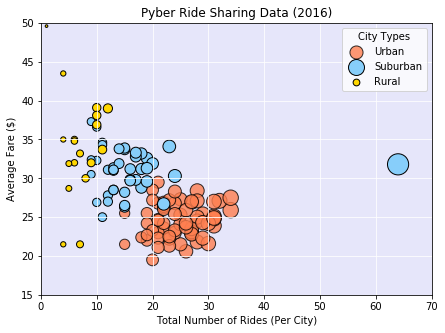

In [53]:
#Scatter Plot Formatting and Labels
plt.xlim(0, 70)
plt.ylim(15, 50)
plt.grid(color='white', axis='both')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(handles=[urban_scat, suburban_scat, rural_scat], title = "City Types", labels=['Urban', 'Suburban', 'Rural'])
plt.show()

In [54]:
#Grab Total Fares Grouped by City Type
totalfares = merge_table['fare'].sum()
totalurban = urban['fare'].sum()
totalsub = suburban['fare'].sum()
totalrural = rural['fare'].sum()

#Calculate percentages by City Type
percsub = (totalsub / totalfares *100).round(1)
percurban = (totalurban / totalfares *100).round(1)
percrural = (totalrural / totalfares *100).round(1)

In [55]:
#Formatting for my Total Fares Pie Plot
fare_label = ['Urban', 'Rural', 'Suburban']
fare_data = [percurban, percrural, percsub]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0.1,0,0)

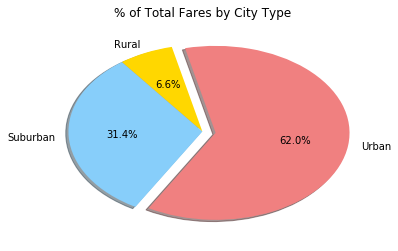

In [56]:
# Tell matplotlib to create a pie plot based on Total Fare Data
plt.pie(fare_data, explode=explode, labels=fare_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Fares by City Type")
plt.show()

In [57]:
#Grab Total Rides Grouped by City Type
totalrides = merge_table['ride_id'].count()
ridesurban = urban['ride_id'].count()
ridesuburban = suburban['ride_id'].count()
ridesrural = rural['ride_id'].count()

#Calculate ride percentages by City Type
percrideurb = (ridesurban / totalrides *100).round(1)
percridesub = (ridesuburban / totalrides *100).round(1)
percriderur = (ridesrural / totalrides *100).round(1)

In [58]:
#Formatting for my Total Rides Pie Plot
ride_label = ['Urban', 'Rural', 'Suburban']
ride_data = [percrideurb, percriderur, percridesub]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0.1,0,0)

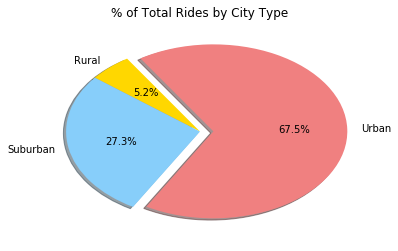

In [59]:
# Tell matplotlib to create a pie plot based upon Total Rides Data
plt.pie(ride_data, explode=explode, labels=ride_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Rides by City Type")
plt.show()

In [28]:
#Grab Total Drivers by City Type
urban1 = citydata_pd[(citydata_pd["type"]== "Urban")]
suburban1 = citydata_pd[(citydata_pd["type"]== "Suburban")]
rural1 = citydata_pd[(citydata_pd["type"]== "Rural")]
totaldrivers = tot_drivers.sum()
urbandrivers = urban1['driver_count'].sum()
suburbandrivers = suburban1["driver_count"].sum()
ruraldrivers = rural1["driver_count"].sum()

percurbdriv = (urbandrivers / totaldrivers*100).round(1)
percsubdriv = (suburbandrivers / totaldrivers*100).round(1)
percrurdriv = (ruraldrivers / totaldrivers*100).round(1)

In [29]:
#Formatting for my Total Drivers Pie Plot
driv_label = ['Urban', 'Rural', 'Suburban']
driv_data = [percurbdriv, percrurdriv, percsubdriv]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0.1,0,0)

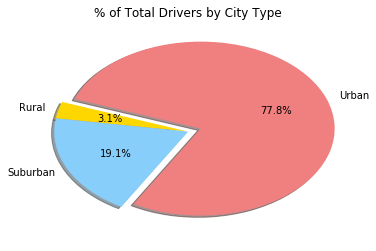

In [30]:
# Tell matplotlib to create a pie plot based upon Total Drivers Data
plt.pie(driv_data, explode=explode, labels=driv_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Drivers by City Type")
plt.show()